In [1]:
%load_ext watermark
%watermark -v -n -m -p numpy,sklearn,pandas,openpyxl,seaborn

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.4.0

numpy   : 1.23.2
sklearn : 1.1.2
pandas  : 1.4.3
openpyxl: 3.0.9
seaborn : 0.11.2

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 5.15.0-46-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from datetime import datetime

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)

/home/fedesss/Dropbox/ML_to_ETa/eta_ml


# Missing Data: Impute or Drop?

In [3]:
input_data = PROJ_ROOT + '/data/processed/processed.pickle'
df = pd.read_pickle(input_data)
# Take features without ETa
eta = df['ETa']
df = df.drop(labels='ETa', axis=1)
df.head()

,NDVI,NDWI,Tmin,Tmax,Tmean,RHmin,RHmax,RHmean,Rs,Ws,Rain,ET0
Data,,,,,,,,,,,,
2009-02-01,1.352840,1.747548,-1.066444,-1.018912,-1.067799,1.537909,0.910621,1.514714,-1.371861,-0.067955,0.747443,-1.147845
2009-02-02,1.352840,1.747753,-0.287116,-0.695179,-0.528263,0.245933,0.910621,0.578772,-1.171007,3.198160,-0.298884,-0.523891
2009-02-03,1.373213,1.807727,0.155684,-0.596652,-0.270574,0.375131,0.910621,0.672366,-1.740092,0.814779,0.462081,-0.855712
2009-02-04,1.176270,1.597436,-0.977884,-0.807782,-0.906744,1.279514,0.910621,1.327526,-0.931719,-1.127235,-0.140349,-1.117308
2009-02-05,1.176270,1.600310,-0.623644,-0.695179,-0.681266,0.245933,0.910621,0.578772,-0.492817,0.663453,-0.267177,-0.724734


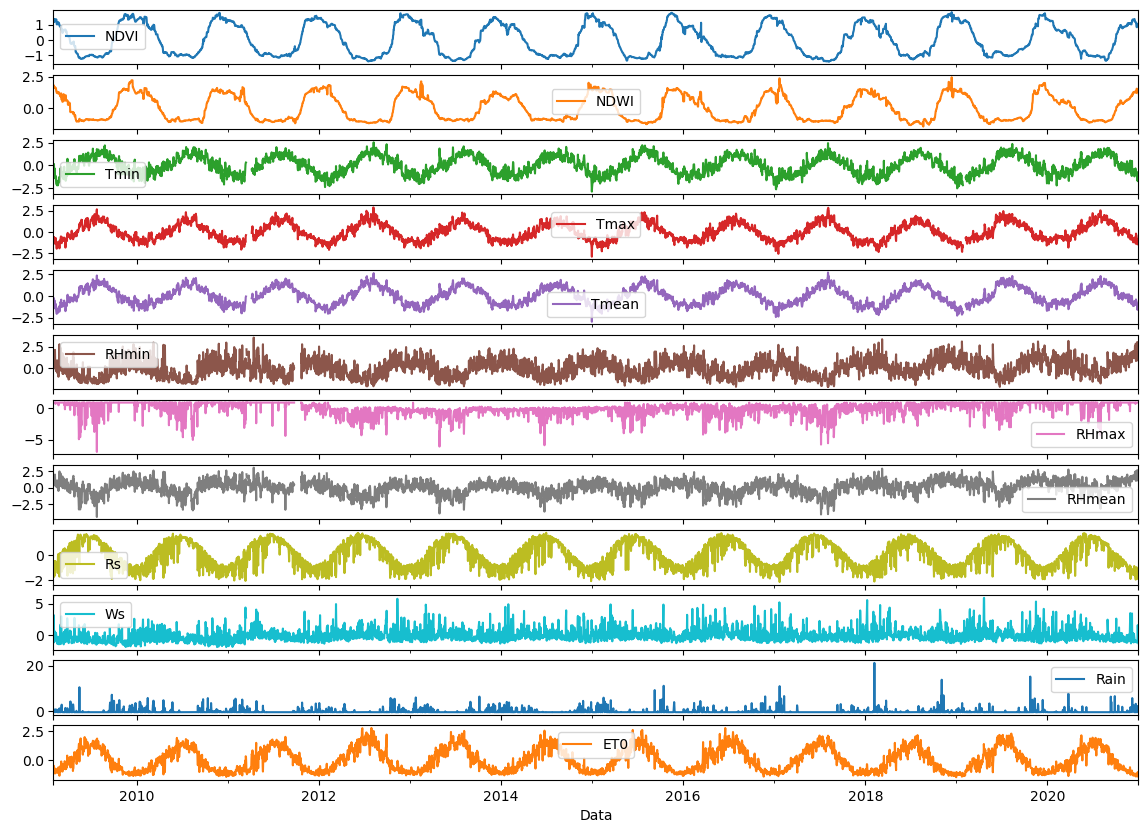

In [5]:
df.plot(subplots=True, figsize=(14, 10))
plt.savefig(PROJ_ROOT + '/visualization/data/' + 'features_series.png')

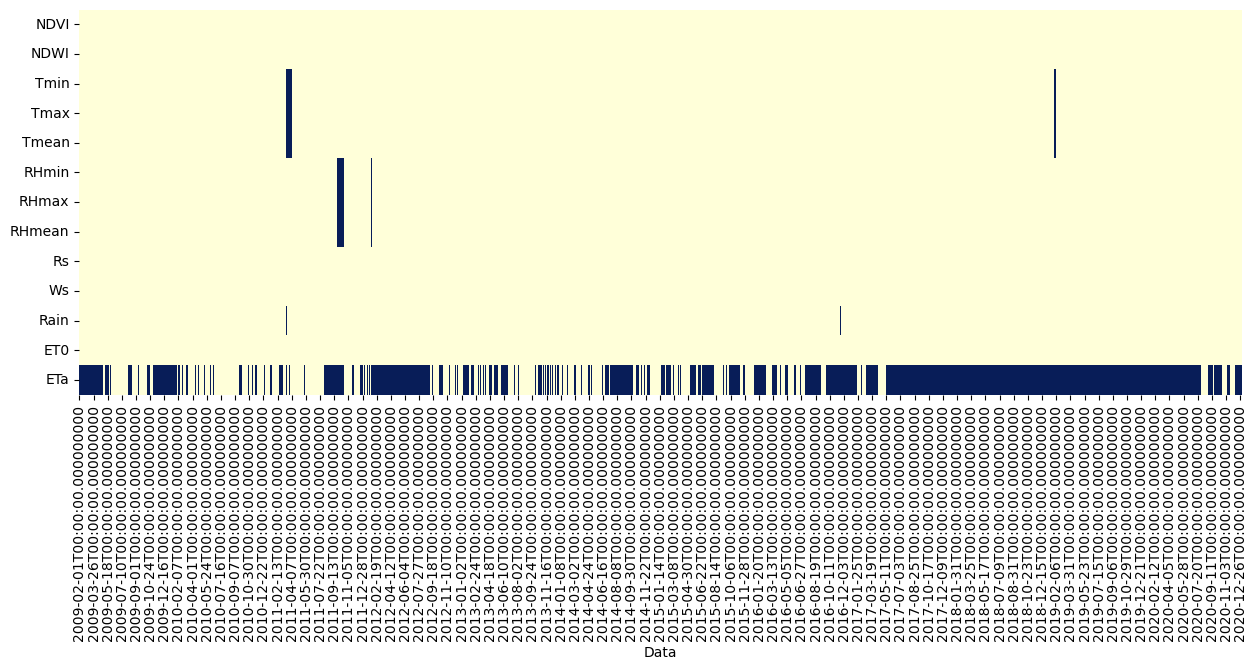

In [6]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.join(eta).isna().T, 
            cmap='YlGnBu',
            cbar=None)
plt.savefig(PROJ_ROOT + '/visualization/data/' + 'missing.png')

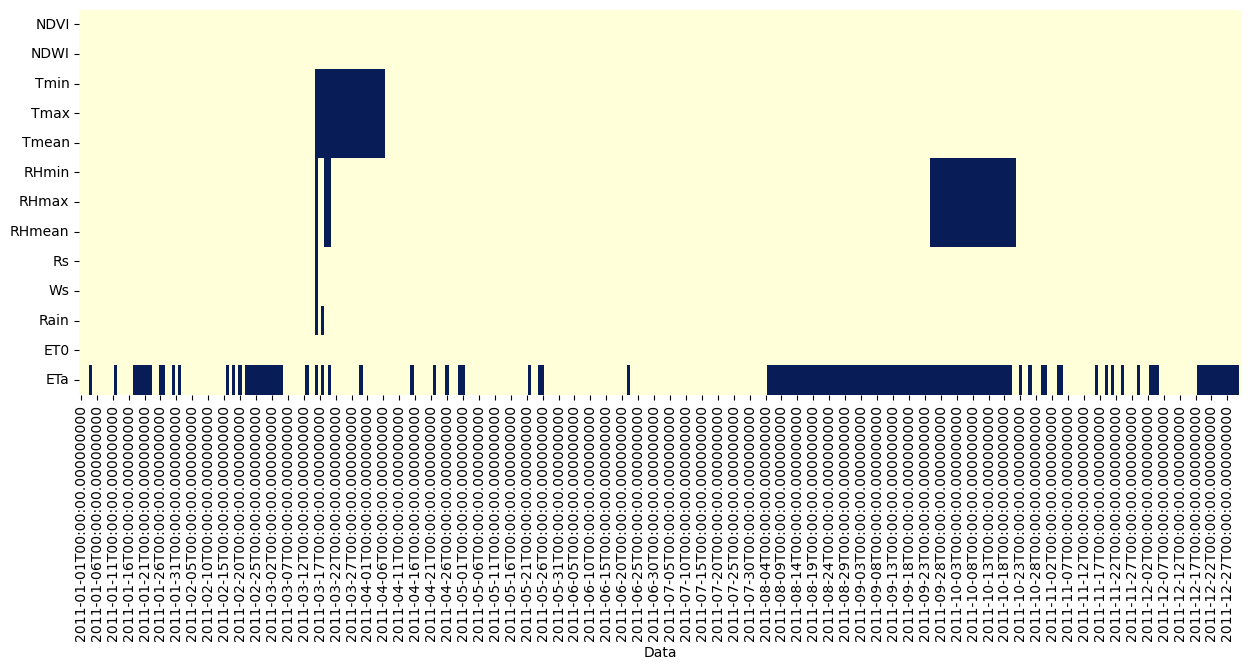

In [7]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.join(eta).loc['2011'].isna().T, 
            cmap='YlGnBu',
            cbar=None)
plt.savefig(PROJ_ROOT + '/visualization/data/' + 'missing_zoom2011.png')

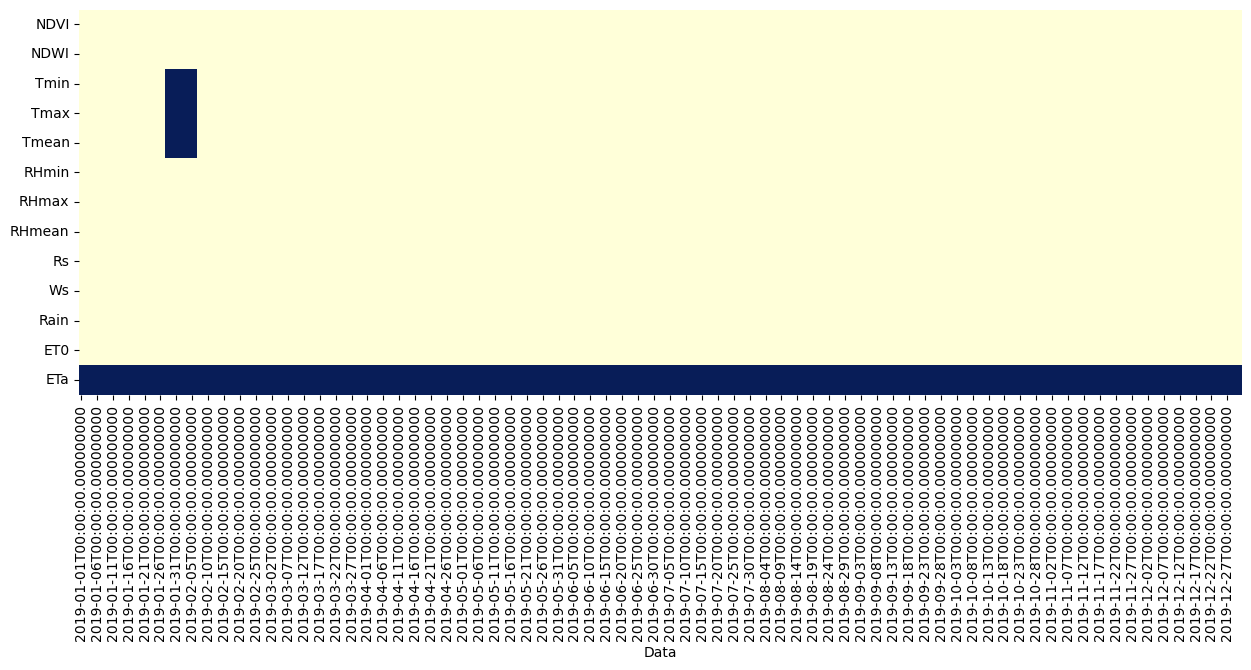

In [8]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.join(eta).loc['2019'].isna().T, 
            cmap='YlGnBu',
            cbar=None)
plt.savefig(PROJ_ROOT + '/visualization/data/' + 'missing_zoom2019.png')

## Conclusion
Better to drop missing values as they are concentrated in big chuncks and it may not be precise to impute them

In [9]:
print("Number of points before and after the drop:")
print(' -', len(eta.dropna()))
print(' -', len(df.join(eta).dropna()))

Number of points before and after the drop:
 - 1572
 - 1551


In [ ]:
df = df.join(eta)

In [16]:
features = [col for col in df.columns if col != 'ETa']
print("Number of points before and after the drop:")
print(' -', len(df))
print(' -', len(df.dropna(subset=features)))
df.dropna(subset=features)

Number of points before and after the drop:
 - 4352
 - 4285


,NDVI,NDWI,Tmin,Tmax,Tmean,RHmin,RHmax,RHmean,Rs,Ws,Rain,ET0,ETa
Data,,,,,,,,,,,,,
2009-02-01,1.352840,1.747548,-1.066444,-1.018912,-1.067799,1.537909,0.910621,1.514714,-1.371861,-0.067955,0.747443,-1.147845,NaN
2009-02-02,1.352840,1.747753,-0.287116,-0.695179,-0.528263,0.245933,0.910621,0.578772,-1.171007,3.198160,-0.298884,-0.523891,NaN
2009-02-03,1.373213,1.807727,0.155684,-0.596652,-0.270574,0.375131,0.910621,0.672366,-1.740092,0.814779,0.462081,-0.855712,NaN
2009-02-04,1.176270,1.597436,-0.977884,-0.807782,-0.906744,1.279514,0.910621,1.327526,-0.931719,-1.127235,-0.140349,-1.117308,NaN
2009-02-05,1.176270,1.600310,-0.623644,-0.695179,-0.681266,0.245933,0.910621,0.578772,-0.492817,0.663453,-0.267177,-0.724734,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1.006492,1.297746,-1.686365,-1.469323,-1.607335,1.925502,0.910621,1.795497,-1.483446,-1.001130,0.684029,-1.413975,NaN
2020-12-28,1.060821,1.287537,-1.155004,-1.286343,-1.261066,1.021119,0.910621,1.140337,-1.151170,1.596629,-0.203763,-1.083543,NaN
2020-12-29,1.060821,1.286869,-0.960172,-0.990761,-1.003377,1.925502,0.910621,1.795497,-1.110255,0.423854,-0.298884,-1.252305,NaN


In [17]:
len(df['ETa'].dropna())

1572